# Analysis

In [1]:
import pandas as pd
# import pickle5 as pickle
# from LabData.DataLoaders.GutMBLoader import GutMBLoader
# from LabData.DataLoaders.SubjectLoader import SubjectLoader
# from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
# from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import lightgbm as lgb

In [2]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [3]:
home_dir = "/home/tomerse/PycharmProjects/pythonProject/"

In [4]:
diet_mb = pd.read_pickle("/home/tomerse/PycharmProjects/pythonProject/data/diet_mb.pkl")
# diet_mb_perm = pd.read_pickle("/home/tomerse/PycharmProjects/pythonProject/pkl/diet_mb_perm.pkl")
# with open('/home/tomerse/PycharmProjects/pythonProject/pkl/my_lists.pkl', 'rb') as file:
#     loaded_lists = pickle.load(file)
# base_features, all_features, targets = loaded_lists
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Anchovy,Aperol,Apple,...,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687,Richness,Shannon_diversity
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,-0.463843,-0.12194,-0.044507,-0.092482,0.428544,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,189,3.71
10K_1001201093,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,-0.463843,-0.12194,-0.044507,-0.092482,0.137250,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,150,3.30
10K_1002254441,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,4.435686,-0.12194,-0.044507,-0.092482,-0.646290,...,-4.000000,-3.368405,-4.0,-4.0,-4.0,-4.000000,-2.523371,-4.000000,250,3.32
10K_1003113258,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,-0.339591,-0.12194,-0.044507,-0.092482,-0.062905,...,-4.000000,-3.677630,-4.0,-4.0,-4.0,-4.000000,-3.861761,-4.000000,262,3.90
10K_1007400622,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,-0.463843,-0.12194,-0.044507,-0.092482,-0.646290,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,166,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9995823183,-0.117501,0.103888,-0.159971,-0.091866,-0.113189,2.659867,-0.12194,-0.044507,-0.092482,-0.646290,...,-3.610761,-3.347382,-4.0,-4.0,-4.0,-2.503550,-2.421434,-4.000000,206,3.57
10K_9996884777,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,-0.319821,-0.12194,-0.044507,-0.092482,-0.646290,...,-3.213395,-3.367979,-4.0,-4.0,-4.0,-4.000000,-3.850233,-3.804074,257,3.89
10K_9998420917,-0.117501,-0.067522,-0.159971,-0.091866,-0.113189,0.720388,-0.12194,-0.044507,-0.092482,0.551649,...,-2.803094,-3.327214,-4.0,-4.0,-4.0,-2.582016,-2.457185,-4.000000,264,4.13


In [5]:
with open('/home/tomerse/PycharmProjects/pythonProject/data/significant_targets.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
significant_targets = loaded_lists
significant_targets

['fBin__100|gBin__473|sBin__693',
 'fBin__100|gBin__473|sBin__694',
 'fBin__100|gBin__477|sBin__698',
 'fBin__100|gBin__481|sBin__704',
 'fBin__100|gBin__481|sBin__705',
 'fBin__100|gBin__481|sBin__706',
 'fBin__100|gBin__483|sBin__709',
 'fBin__102|gBin__490|sBin__721',
 'fBin__102|gBin__490|sBin__722',
 'fBin__103|gBin__491|sBin__727',
 'fBin__104|gBin__493|sBin__730',
 'fBin__104|gBin__498|sBin__736',
 'fBin__108|gBin__515|sBin__767',
 'fBin__108|gBin__517|sBin__769',
 'fBin__108|gBin__521|sBin__773',
 'fBin__108|gBin__523|sBin__776',
 'fBin__108|gBin__525|sBin__778',
 'fBin__108|gBin__526|sBin__779',
 'fBin__108|gBin__531|sBin__787',
 'fBin__121|gBin__564|sBin__834',
 'fBin__121|gBin__566|sBin__836',
 'fBin__121|gBin__568|sBin__838',
 'fBin__121|gBin__568|sBin__840',
 'fBin__121|gBin__568|sBin__842',
 'fBin__121|gBin__571|sBin__846',
 'fBin__121|gBin__572|sBin__848',
 'fBin__145|gBin__624|sBin__924',
 'fBin__145|gBin__624|sBin__939',
 'fBin__149|gBin__637|sBin__959',
 'fBin__149|gB

### Before & After

In [7]:
TARGETS = 'abundance' # 'div' or 'abundance'

with open('/home/tomerse/PycharmProjects/pythonProject/data/my_lists_pnp3.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
overlap_features, targets_pnp3 = loaded_lists
baseline_diet_mb = pd.read_pickle("/home/tomerse/PycharmProjects/pythonProject/data/diet_mb_pnp3_baseline.pkl")
intervention_diet_mb = pd.read_pickle("/home/tomerse/PycharmProjects/pythonProject/data/diet_mb_pnp3_intervention.pkl")

lgbm_diet_scores_overlapf, lgbm_diet_pvalues_overlapf, lgbm_diet_coefs_overlapf, lgbm_diet_preds_overlapf, lgbm_diet_targets_overlapf = read_results(pd.read_csv("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/lightGBM_overlap_features.csv")) # 10K
lgbm_div_scores_overlapf, lgbm_div_pvalues_overlapf, lgbm_div_coefs_overlapf, lgbm_div_preds_overlapf, lgbm_div_targets_overlapf = read_results(pd.read_csv("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/lightGBM_overlap_features_div.csv")) # 10K
predicted_baseline_scores, predicted_baseline_pvalues, predicted_baseline_coefs, predicted_baseline_preds, predicted_baseline_targets = read_results(pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/pnp3_baseline_" + TARGETS + ".pkl"))
predicted_intervention_scores, predicted_intervention_pvalues, predicted_intervention_coefs, predicted_intervention_preds, predicted_intervention_targets = read_results(pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/pnp3_intervention_" + TARGETS + ".pkl"))

mb_names = pd.read_pickle("/home/tomerse/PycharmProjects/pythonProject/data/mb_names.pkl")

In [8]:


if TARGETS == 'div':
    div_targets = ['Richness', 'Shannon_diversity']
    targets = div_targets
elif TARGETS == 'abundance':
    targets = significant_targets

#### How does LGBM compare with all features and with the the overlap features?

In [9]:
lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets = read_results(pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/output_LGBM_abundance.pkl"))
print(lgbm_diet_scores)

0      0.045924
1      0.070626
2      0.025889
3      0.126437
4      0.036592
         ...   
721    0.017941
722    0.055065
723    0.036495
724    0.064493
725    0.086876
Name: 0, Length: 726, dtype: float64


In [10]:
lgbm_div_scores, lgbm_div_pvalues, lgbm_div_coefs, lgbm_div_preds, lgbm_div_targets = read_results(pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/test/output_LGBM_div.pkl"))
print(lgbm_div_scores)

0    0.238212
1    0.215571
Name: 0, dtype: float64


In [11]:
lgbm_diet_scores_overlapf

0      0.036653
1      0.077891
2      0.034633
3      0.124854
4      0.032778
         ...   
721    0.018610
722    0.051360
723    0.027925
724    0.055956
725    0.076023
Name: column0, Length: 726, dtype: float64

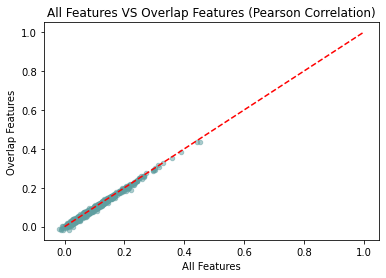

<Figure size 432x288 with 0 Axes>

In [12]:
if TARGETS == 'abundance':
    scores = lgbm_diet_scores
    scores_overlapf = lgbm_diet_scores_overlapf
elif TARGETS == 'div':
    scores = lgbm_div_scores
    scores_overlapf = lgbm_div_scores_overlapf

%matplotlib inline
U, p = stats.mannwhitneyu(scores, scores_overlapf, alternative='two-sided')
to_plot = pd.concat([scores, scores_overlapf] , axis=1)
to_plot.columns = ["All Features", "Overlap Features"]
to_plot.plot.scatter("All Features", "Overlap Features", color='cadetblue', alpha=0.5)
plt.title("All Features VS Overlap Features (Pearson Correlation)")
plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
# plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig("/home/tomerse/PycharmProjects/pythonProject/figures/overlap_features_vs_all_features" + TARGETS + ".png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

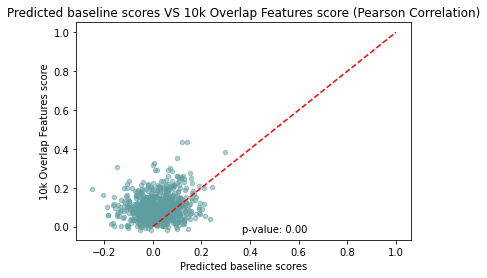

<Figure size 432x288 with 0 Axes>

In [13]:
# How well did the model predict the microbiome from diet on baseline and on intervention?
%matplotlib inline

if TARGETS == 'abundance':
    tenk_corr = lgbm_diet_scores_overlapf
elif TARGETS == 'div':
    tenk_corr = lgbm_div_scores_overlapf

U, p = stats.mannwhitneyu(predicted_baseline_scores, tenk_corr, alternative='two-sided')
to_plot = pd.concat([predicted_baseline_scores, tenk_corr] , axis=1)
to_plot.columns = ["Predicted baseline scores", "10k Overlap Features score"]
to_plot.plot.scatter("Predicted baseline scores", "10k Overlap Features score", color='cadetblue', alpha=0.5)
plt.title("Predicted baseline scores VS 10k Overlap Features score (Pearson Correlation)")
plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig("/home/tomerse/PycharmProjects/pythonProject/data/overlap_features_vs_predicted_baseline_" + TARGETS + ".png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

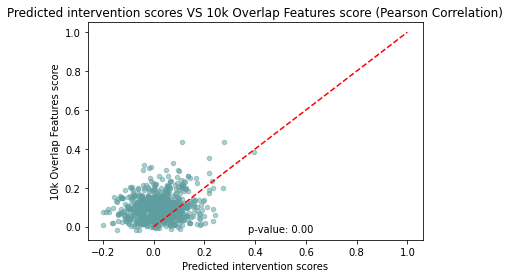

<Figure size 432x288 with 0 Axes>

In [14]:
# How well did the model predict the microbiome from diet on baseline and on intervention?
%matplotlib inline

if TARGETS == 'abundance':
    tenk_corr = lgbm_diet_scores_overlapf
elif TARGETS == 'div':
    tenk_corr = lgbm_div_scores_overlapf

U, p = stats.mannwhitneyu(predicted_intervention_scores, tenk_corr, alternative='two-sided')
to_plot = pd.concat([predicted_intervention_scores, tenk_corr] , axis=1)
to_plot.columns = ["Predicted intervention scores", "10k Overlap Features score"]
to_plot.plot.scatter("Predicted intervention scores", "10k Overlap Features score", color='cadetblue', alpha=0.5)
plt.title("Predicted intervention scores VS 10k Overlap Features score (Pearson Correlation)")
plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
plt.text(0.5, plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), f'p-value: {p:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
plt.savefig("/home/tomerse/PycharmProjects/pythonProject/data/overlap_features_vs_predicted_intervention_" + TARGETS + ".png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()
plt.clf()

In [15]:
# Real measured changes before after
delta_real = intervention_diet_mb[targets] - baseline_diet_mb[targets]
# score = stats.pearsonr(preds, targets)
delta_real

,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__477|sBin__698,fBin__100|gBin__481|sBin__704,fBin__100|gBin__481|sBin__705,fBin__100|gBin__481|sBin__706,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__721,fBin__102|gBin__490|sBin__722,fBin__103|gBin__491|sBin__727,...,fBin__86|gBin__423|sBin__618,fBin__86|gBin__423|sBin__620,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
2893,0.036565,0.0,-0.107523,0.0,0.0,0.00000,0.000000,-0.719515,0.0,0.000000,...,0.485393,0.387615,0.000000,0.821298,0.580895,0.0,0.871015,0.0,0.398247,-0.163115
12752,0.000000,0.0,0.739229,0.0,0.0,0.34173,0.773647,0.000000,0.0,0.000000,...,0.000000,0.412928,0.646234,0.000000,0.478813,0.0,0.000000,0.0,0.000000,0.524832
17298,0.000000,0.0,0.000000,0.0,0.0,0.00000,-0.259071,0.728683,0.0,0.000000,...,0.000000,0.190325,0.205555,1.268780,0.517026,0.0,0.000000,0.0,0.000000,0.000000
24153,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.160903,2.009603,0.000000,0.000000,0.0,0.000000,0.0,2.017569,0.000000
41275,0.000000,0.0,-0.293147,0.0,0.0,0.00000,0.000000,0.695970,0.0,-0.411936,...,-0.227129,-0.908440,-0.054165,0.000000,0.000000,0.0,0.000000,0.0,-0.002787,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981727,0.000000,0.0,0.668434,0.0,0.0,0.00000,-0.142867,0.000000,0.0,0.393049,...,0.000000,0.199849,0.000000,0.000000,0.159614,0.0,0.000000,0.0,0.000000,0.000000
988899,-0.251454,0.0,-0.633095,0.0,0.0,0.00000,0.417405,0.000000,0.0,0.000000,...,-0.336319,0.129911,-0.558997,0.000000,-0.464355,0.0,0.000000,0.0,0.000000,0.000000
992638,0.000000,0.0,0.000000,0.0,0.0,0.00000,-0.160685,0.000000,0.0,0.000000,...,-0.106204,0.001911,0.000000,0.000000,-0.314646,0.0,0.000000,0.0,-0.095365,0.000000


In [16]:
if TARGETS == 'abundance':
    # Is there change in the yogurt, coffee and nuts microbes?
    print("S. Thermophilus:\n", delta_real["fBin__187|gBin__748|sBin__1116"].describe(), "\n")
    print("Lawsonibacter:\n", delta_real["fBin__541|gBin__2135|sBin__3290"].describe(), "\n")
    print("Nuts microbe:\n", delta_real["fBin__367|gBin__1458|sBin__2166"].describe(), "\n")

S. Thermophilus:
 count    187.000000
mean      -0.010396
std        0.571858
min       -1.738461
25%       -0.149200
50%        0.000000
75%        0.136675
max        1.831469
Name: fBin__187|gBin__748|sBin__1116, dtype: float64 

Lawsonibacter:
 count    187.000000
mean       0.048812
std        0.413387
min       -1.285882
25%       -0.198688
50%        0.000000
75%        0.289775
max        1.133463
Name: fBin__541|gBin__2135|sBin__3290, dtype: float64 

Nuts microbe:
 count    187.000000
mean       0.183838
std        0.655208
min       -2.134090
25%       -0.214437
50%        0.013907
75%        0.588552
max        2.067647
Name: fBin__367|gBin__1458|sBin__2166, dtype: float64 



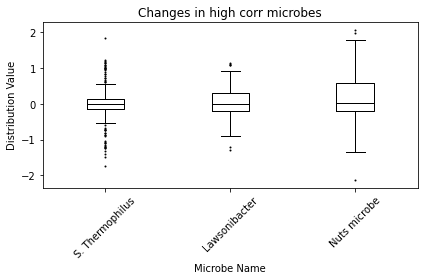

In [71]:

if TARGETS == 'abundance':
    fig, ax = plt.subplots()
    ax.boxplot([delta_real["fBin__187|gBin__748|sBin__1116"], delta_real["fBin__541|gBin__2135|sBin__3290"], delta_real["fBin__367|gBin__1458|sBin__2166"]], labels=["S. Thermophilus", "Lawsonibacter", "Nuts microbe"],
               medianprops=dict(color='black'),
                flierprops=dict(marker='.', color='black', markersize=2, alpha=1))
    ax.set_xlabel("Microbe Name")
    ax.set_ylabel("Distribution Value")
    ax.set_title("Changes in high corr microbes")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(home_dir + "figures/changes_in_high_corr_abundance.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()

if TARGETS == 'div':    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Richness subplot
    axes[0].axhline(0, color='black', linewidth=1, linestyle='--')
    axes[0].boxplot(delta_real["Richness"], labels=["Richness"],
                    medianprops=dict(color='black'),
                    flierprops=dict(marker='.', color='black', markersize=2, alpha=1))
    axes[0].set_title("Changes in Richness")

    # Shannon diversity subplot
    axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
    axes[1].boxplot(delta_real["Shannon_diversity"], labels=["Shannon Diversity"],
                    medianprops=dict(color='black'),
                    flierprops=dict(marker='.', color='black', markersize=2, alpha=1))
    axes[1].set_title("Changes in Shannon Diversity")

    # Adjust layout
    plt.tight_layout()
    plt.savefig(home_dir + "figures/changes_in_diversity.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()

In [45]:
# Is there change in the dietary consumption of yogurt, coffee or nuts?
delta_real_features = intervention_diet_mb[overlap_features] - baseline_diet_mb[overlap_features]
delta_real_features

,Alfalfa sprouts,Almond Beverage,Almond spread,Almonds,Amba,Anchovy,Apple,Apple Cake,Apple juice,Applesauce,...,"Fatty acids, total polyunsaturated","Fatty acids, total saturated",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D (D2 + D3),vitamin_E,"Zinc, Zn",age,gender
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
2893,0.000049,0.0,0.0,0.002269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.023163,-0.203556,0.050092,0.276503,40.931511,4.527498,1.243642,2.361576,0.0,0.0
12752,0.000008,0.0,0.0,0.028717,0.000000,0.000116,-0.002279,0.000000,0.000000,0.000000,...,7.711795,4.730117,1.736658,-0.031958,-36.822280,-40.920759,5.714651,-0.027339,0.0,0.0
17298,0.000000,0.0,0.0,0.000000,0.000088,0.000000,0.008046,0.000000,0.000675,0.000284,...,5.868603,9.725432,3.481995,0.684756,-22.723706,58.271908,1.371491,6.127988,0.0,0.0
24153,-0.000188,0.0,0.0,0.015037,0.000000,0.000000,-0.002942,0.000000,0.000000,0.000000,...,5.429867,2.845739,1.473625,-0.026697,0.277127,0.590958,-0.320119,-0.212612,0.0,0.0
41275,0.000000,0.0,0.0,-0.009620,0.000000,0.000078,-0.001629,0.000000,0.000000,0.000401,...,-0.871812,-0.687083,-0.999397,0.211247,13.817092,6.002116,-1.042324,0.723477,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981727,0.000000,0.0,0.0,0.007950,0.000421,0.000000,0.001100,-0.021007,0.002070,0.000000,...,1.374476,-3.973889,-1.222802,-0.210713,18.724105,-5.454597,-1.076466,-1.463999,0.0,0.0
988899,0.000000,0.0,0.0,0.024147,-0.000298,0.001522,0.010060,0.000000,0.000000,0.000000,...,3.860270,5.104549,1.071793,-0.062374,6.338439,15.115611,4.082256,-0.180878,0.0,0.0
992638,0.000000,0.0,0.0,0.000782,0.000000,0.000000,0.002555,0.000000,0.000000,0.000000,...,-2.437800,-4.926654,0.195513,0.948208,52.978721,0.178891,4.251695,1.206789,0.0,0.0


In [46]:
intervention_diet_mb["Yogurt"].describe()

count    1.870000e+02
mean     7.006130e-04
std      3.235619e-03
min     -6.959721e-17
25%     -6.959721e-17
50%     -6.959721e-17
75%     -6.959721e-17
max      3.035572e-02
Name: Yogurt, dtype: float64

In [47]:
delta_real_features["Yogurt"].describe()

count    187.000000
mean       0.000334
std        0.002785
min       -0.007992
25%        0.000000
50%        0.000000
75%        0.000000
max        0.030356
Name: Yogurt, dtype: float64

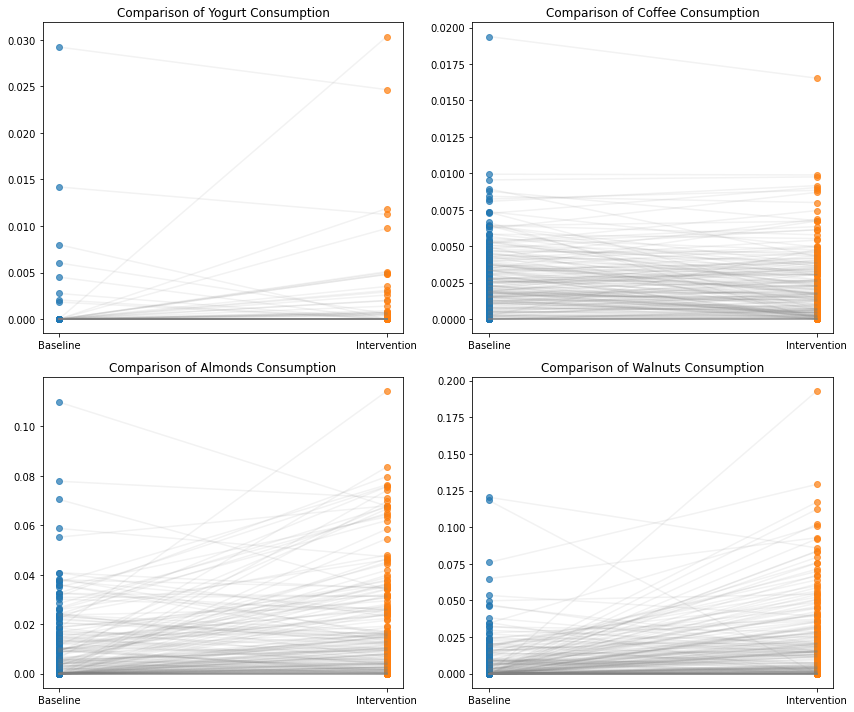

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure with 4 subplots arranged in 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2x2 array to make indexing easier
positions = [1, 2]

# List of food items
foods = ["Yogurt", "Coffee", "Almonds", "Walnuts"]

for idx, food in enumerate(foods):
    # Assuming 'baseline_diet_mb' and 'intervention_diet_mb' are defined with each food type
    data = pd.DataFrame({
        "Baseline": baseline_diet_mb[food],
        "Intervention": intervention_diet_mb[food]
    })

    # Plotting for each food
    ax = axes[idx]
    for i, col in enumerate(data.columns):
        y = data[col]
        x = [positions[i]] * len(y)
        ax.scatter(x, y, alpha=0.7)

    # Connect dots between points
    for i in range(len(data)):
        ax.plot([1, 2], [data['Baseline'].iloc[i], data['Intervention'].iloc[i]], color='grey', alpha=0.1)

    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Baseline', 'Intervention'])
    ax.set_title(f"Comparison of {food} Consumption")
    # ax.set_ylabel("Z score")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [49]:
predicted_intervention_df = pd.DataFrame(predicted_intervention_preds.to_list()).T
predicted_baseline_df = pd.DataFrame(predicted_baseline_preds.to_list()).T

In [50]:
predicted_baseline_df

,0,1,2,3,4,5,6,7,8,9,...,716,717,718,719,720,721,722,723,724,725
0,-3.871885,-3.910222,-3.569021,-3.076933,-3.911863,-3.830719,-3.689413,-3.261196,-3.924775,-3.210906,...,-3.907289,-3.657104,-3.716297,-3.656022,-3.926673,-3.907364,-3.892626,-3.900854,-3.548260,-3.781537
1,-3.871359,-3.909770,-3.570694,-3.074700,-3.909342,-3.825288,-3.682979,-3.255113,-3.924285,-3.208546,...,-3.908217,-3.656755,-3.714224,-3.654554,-3.926947,-3.902016,-3.893235,-3.900775,-3.547778,-3.777554
2,-3.871715,-3.910049,-3.573462,-3.078337,-3.912305,-3.833619,-3.697918,-3.259825,-3.924295,-3.208962,...,-3.907508,-3.657694,-3.715507,-3.656686,-3.925454,-3.908021,-3.892954,-3.901334,-3.547765,-3.780767
3,-3.872154,-3.909866,-3.573493,-3.075127,-3.911123,-3.825594,-3.687901,-3.258339,-3.924258,-3.208122,...,-3.903712,-3.656302,-3.713740,-3.656278,-3.926527,-3.909321,-3.892254,-3.901523,-3.546645,-3.781100
4,-3.871947,-3.908681,-3.570237,-3.075857,-3.911173,-3.825822,-3.687873,-3.257293,-3.924398,-3.206235,...,-3.908306,-3.656404,-3.715427,-3.655371,-3.926632,-3.906513,-3.893617,-3.900956,-3.547169,-3.780304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-3.871596,-3.908964,-3.568331,-3.076692,-3.909464,-3.825888,-3.685540,-3.253012,-3.924301,-3.205879,...,-3.908122,-3.658435,-3.713588,-3.654944,-3.926833,-3.902326,-3.893745,-3.901002,-3.547061,-3.778186
183,-3.871753,-3.909109,-3.574578,-3.064539,-3.912792,-3.826720,-3.685755,-3.260678,-3.925361,-3.211588,...,-3.907609,-3.654375,-3.714867,-3.653764,-3.926934,-3.907547,-3.893954,-3.902465,-3.548441,-3.776305
184,-3.871679,-3.909273,-3.577160,-3.064133,-3.911262,-3.827377,-3.684447,-3.266154,-3.925391,-3.212951,...,-3.906673,-3.656023,-3.714751,-3.654817,-3.927109,-3.904990,-3.894316,-3.902502,-3.548504,-3.778946
185,-3.873126,-3.910078,-3.571439,-3.079186,-3.908755,-3.826120,-3.683394,-3.257052,-3.924090,-3.206550,...,-3.908161,-3.657406,-3.715303,-3.655462,-3.926828,-3.904050,-3.893311,-3.901498,-3.547182,-3.777371


In [51]:
predicted_intervention_df

,0,1,2,3,4,5,6,7,8,9,...,716,717,718,719,720,721,722,723,724,725
0,-3.872010,-3.910221,-3.567758,-3.077090,-3.911198,-3.827063,-3.684737,-3.258147,-3.924405,-3.209886,...,-3.907325,-3.656330,-3.715889,-3.655945,-3.926575,-3.903891,-3.892155,-3.900867,-3.546910,-3.778318
1,-3.870682,-3.908409,-3.567186,-3.076875,-3.907976,-3.822218,-3.682421,-3.249953,-3.924121,-3.205886,...,-3.907784,-3.656655,-3.714140,-3.655473,-3.926457,-3.904663,-3.890531,-3.901002,-3.544884,-3.775151
2,-3.871405,-3.908915,-3.569725,-3.078712,-3.911168,-3.824539,-3.685964,-3.249813,-3.924049,-3.207761,...,-3.906867,-3.656506,-3.713554,-3.655857,-3.926533,-3.905924,-3.889921,-3.901121,-3.548474,-3.778687
3,-3.871311,-3.908061,-3.569376,-3.078920,-3.911220,-3.825463,-3.683429,-3.253598,-3.924320,-3.206597,...,-3.906540,-3.656535,-3.712832,-3.654851,-3.925752,-3.905293,-3.891891,-3.901485,-3.546522,-3.781694
4,-3.871701,-3.905674,-3.567097,-3.077702,-3.911610,-3.825385,-3.686637,-3.253001,-3.924282,-3.206855,...,-3.906233,-3.656785,-3.713125,-3.656395,-3.926273,-3.906940,-3.891110,-3.897337,-3.546389,-3.780015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-3.871588,-3.909068,-3.570112,-3.076988,-3.910549,-3.825420,-3.685500,-3.251101,-3.924308,-3.206900,...,-3.908167,-3.657288,-3.713650,-3.654834,-3.926582,-3.905655,-3.892916,-3.901041,-3.545545,-3.776728
183,-3.871699,-3.909553,-3.568070,-3.077106,-3.909354,-3.825118,-3.677380,-3.246001,-3.924316,-3.205459,...,-3.906773,-3.656849,-3.714079,-3.655870,-3.926483,-3.902780,-3.892297,-3.901486,-3.547083,-3.776621
184,-3.871724,-3.908975,-3.577525,-3.064314,-3.911370,-3.827213,-3.680759,-3.263594,-3.924820,-3.208718,...,-3.906898,-3.652094,-3.713265,-3.653625,-3.927011,-3.904631,-3.893659,-3.901345,-3.547390,-3.777887
185,-3.872797,-3.909936,-3.567474,-3.078161,-3.910615,-3.826307,-3.683395,-3.254612,-3.924159,-3.208376,...,-3.908252,-3.657909,-3.713483,-3.655824,-3.926431,-3.907212,-3.892555,-3.901486,-3.545182,-3.777225


In [52]:
delta_predicted = predicted_intervention_df - predicted_baseline_df
if TARGETS == 'abundance':
    delta_predicted.columns = targets_pnp3
elif TARGETS == 'div':
    delta_predicted.columns = div_targets
delta_predicted.index = delta_real.index
delta_predicted = delta_predicted[targets]
delta_predicted

,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__477|sBin__698,fBin__100|gBin__481|sBin__704,fBin__100|gBin__481|sBin__705,fBin__100|gBin__481|sBin__706,fBin__100|gBin__483|sBin__709,fBin__102|gBin__490|sBin__721,fBin__102|gBin__490|sBin__722,fBin__103|gBin__491|sBin__727,...,fBin__86|gBin__423|sBin__618,fBin__86|gBin__423|sBin__620,fBin__86|gBin__429|sBin__631,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
2893,-0.000126,9.021244e-07,-0.000157,0.000664,0.003656,0.004677,0.003049,0.001020,-2.857590e-05,-0.000641,...,-0.001616,-0.004454,0.000774,0.000409,0.000077,0.000098,0.000471,-0.000013,0.001351,0.003219
12752,0.000677,1.360734e-03,-0.002174,0.001366,0.003070,0.000559,0.005160,0.002661,7.390209e-04,-0.000828,...,-0.000005,-0.000883,0.000100,0.000085,-0.000919,0.000490,0.002703,-0.000227,0.002894,0.002403
17298,0.000311,1.133567e-03,-0.000376,0.001137,0.009080,0.011955,0.010012,0.001201,-4.514632e-04,0.002676,...,-0.000866,-0.000625,0.001188,0.001953,0.000830,-0.001079,0.003033,0.000213,-0.000709,0.002080
24153,0.000843,1.804618e-03,-0.003793,-0.000098,0.000130,0.004472,0.004742,0.001526,3.306390e-04,0.001375,...,-0.001326,0.000171,-0.000233,0.000909,0.001427,0.000775,0.000363,0.000038,0.000123,-0.000594
41275,0.000246,3.006802e-03,-0.001845,-0.000437,0.000437,0.001236,0.004291,-0.000620,-6.579159e-07,0.000546,...,0.003652,-0.002473,-0.000380,0.002302,-0.001024,0.000359,0.002507,0.003620,0.000780,0.000288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981727,0.000008,-1.038857e-04,-0.000296,-0.001084,0.000468,0.000040,0.001912,-0.001021,-3.176271e-04,-0.000421,...,-0.001802,-0.001638,0.001147,-0.000063,0.000110,0.000252,0.000829,-0.000039,0.001516,0.001459
988899,0.000054,-4.441529e-04,-0.012567,0.003439,0.001602,0.008375,0.014677,0.006130,-2.314235e-04,0.002030,...,-0.001740,0.003427,-0.002474,0.000788,-0.002106,0.000452,0.001656,0.000979,0.001357,-0.000315
992638,-0.000045,2.983773e-04,-0.000180,-0.000108,0.000163,0.003688,0.002560,0.004233,1.119082e-04,-0.000122,...,0.000220,-0.000394,0.003929,0.001487,0.001192,0.000098,0.000656,0.001157,0.001114,0.001059


In [53]:
predicted_intervention_df

,0,1,2,3,4,5,6,7,8,9,...,716,717,718,719,720,721,722,723,724,725
0,-3.872010,-3.910221,-3.567758,-3.077090,-3.911198,-3.827063,-3.684737,-3.258147,-3.924405,-3.209886,...,-3.907325,-3.656330,-3.715889,-3.655945,-3.926575,-3.903891,-3.892155,-3.900867,-3.546910,-3.778318
1,-3.870682,-3.908409,-3.567186,-3.076875,-3.907976,-3.822218,-3.682421,-3.249953,-3.924121,-3.205886,...,-3.907784,-3.656655,-3.714140,-3.655473,-3.926457,-3.904663,-3.890531,-3.901002,-3.544884,-3.775151
2,-3.871405,-3.908915,-3.569725,-3.078712,-3.911168,-3.824539,-3.685964,-3.249813,-3.924049,-3.207761,...,-3.906867,-3.656506,-3.713554,-3.655857,-3.926533,-3.905924,-3.889921,-3.901121,-3.548474,-3.778687
3,-3.871311,-3.908061,-3.569376,-3.078920,-3.911220,-3.825463,-3.683429,-3.253598,-3.924320,-3.206597,...,-3.906540,-3.656535,-3.712832,-3.654851,-3.925752,-3.905293,-3.891891,-3.901485,-3.546522,-3.781694
4,-3.871701,-3.905674,-3.567097,-3.077702,-3.911610,-3.825385,-3.686637,-3.253001,-3.924282,-3.206855,...,-3.906233,-3.656785,-3.713125,-3.656395,-3.926273,-3.906940,-3.891110,-3.897337,-3.546389,-3.780015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-3.871588,-3.909068,-3.570112,-3.076988,-3.910549,-3.825420,-3.685500,-3.251101,-3.924308,-3.206900,...,-3.908167,-3.657288,-3.713650,-3.654834,-3.926582,-3.905655,-3.892916,-3.901041,-3.545545,-3.776728
183,-3.871699,-3.909553,-3.568070,-3.077106,-3.909354,-3.825118,-3.677380,-3.246001,-3.924316,-3.205459,...,-3.906773,-3.656849,-3.714079,-3.655870,-3.926483,-3.902780,-3.892297,-3.901486,-3.547083,-3.776621
184,-3.871724,-3.908975,-3.577525,-3.064314,-3.911370,-3.827213,-3.680759,-3.263594,-3.924820,-3.208718,...,-3.906898,-3.652094,-3.713265,-3.653625,-3.927011,-3.904631,-3.893659,-3.901345,-3.547390,-3.777887
185,-3.872797,-3.909936,-3.567474,-3.078161,-3.910615,-3.826307,-3.683395,-3.254612,-3.924159,-3.208376,...,-3.908252,-3.657909,-3.713483,-3.655824,-3.926431,-3.907212,-3.892555,-3.901486,-3.545182,-3.777225


In [54]:
# import scipy.stats as stats
# from statsmodels.stats.multitest import multipletests

# results = {}
# pearson_p_values = []
# spearman_p_values = []

# for column in delta_real.columns:
#     if column in delta_predicted.columns:
#         # Compute Pearson correlation
#         pearson_corr, pearson_p_val = stats.pearsonr(delta_real[column], delta_predicted[column])
#         pearson_p_values.append(pearson_p_val)

#         # Compute Spearman correlation
#         spearman_corr, spearman_p_val = stats.spearmanr(delta_real[column], delta_predicted[column])
#         spearman_p_values.append(spearman_p_val)

#         # Store results
#         results[column] = {
#             'Pearson Correlation': pearson_corr,
#             'Pearson Pval': pearson_p_val,
#             'Spearman Correlation': spearman_corr,
#             'Spearman Pval': spearman_p_val
#         }

# # Adjust the p-values for multiple testing using FDR
# pearson_p_adjusted = multipletests(pearson_p_values, method='fdr_bh')[1]
# spearman_p_adjusted = multipletests(spearman_p_values, method='fdr_bh')[1]

# # Add adjusted p-values to the results
# for i, column in enumerate(results):
#     results[column]['Pearson Pval_adj'] = pearson_p_adjusted[i]
#     results[column]['Spearman Pval_adj'] = spearman_p_adjusted[i]

# results_df = pd.DataFrame(results).T  # Transpose to have columns as keys


# # Define the desired column order
# column_order = [
#     'Pearson Correlation', 'Pearson Pval', 'Pearson Pval_adj',
#     'Spearman Correlation', 'Spearman Pval', 'Spearman Pval_adj'
# ]

# # Reorder the columns according to the specified order
# results_df = results_df[column_order]

# # Optionally sort by one of the correlation metrics
# sorted_results_df = results_df.sort_values(by="Pearson Correlation", ascending=False)

# print(sorted_results_df)


In [55]:
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

results = {}
pearson_p_values = []
spearman_p_values = []

for column in delta_real.columns:
    if column in delta_predicted.columns:
        # Compute Pearson correlation
        pearson_corr, pearson_p_val = stats.pearsonr(delta_real[column], delta_predicted[column])
        pearson_p_values.append(pearson_p_val)

        # Compute Spearman correlation
        spearman_corr, spearman_p_val = stats.spearmanr(delta_real[column], delta_predicted[column])
        spearman_p_values.append(spearman_p_val)

        # Store results
        results[column] = {
            'Pearson Correlation': pearson_corr,
            'Pearson Pval': pearson_p_val,
            'Spearman Correlation': spearman_corr,
            'Spearman Pval': spearman_p_val
        }

# Adjust the p-values for multiple testing using FDR
pearson_p_adjusted = multipletests(pearson_p_values, method='fdr_bh')[1]
spearman_p_adjusted = multipletests(spearman_p_values, method='fdr_bh')[1]

# Add adjusted p-values to the results
for i, column in enumerate(results):
    results[column]['Pearson Pval_adj'] = pearson_p_adjusted[i]
    results[column]['Spearman Pval_adj'] = spearman_p_adjusted[i]

results_df = pd.DataFrame(results).T  # Transpose to have columns as keys


# Define the desired column order
column_order = [
    'Pearson Correlation', 'Pearson Pval', 'Pearson Pval_adj',
    'Spearman Correlation', 'Spearman Pval', 'Spearman Pval_adj'
]

# Reorder the columns according to the specified order
results_df = results_df[column_order]

results_df


,Pearson Correlation,Pearson Pval,Pearson Pval_adj,Spearman Correlation,Spearman Pval,Spearman Pval_adj
fBin__100|gBin__473|sBin__693,-0.029802,0.685554,0.950670,-0.091254,0.214197,0.840750
fBin__100|gBin__473|sBin__694,-0.034606,0.638211,0.950670,-0.069359,0.345554,0.857995
fBin__100|gBin__477|sBin__698,-0.087987,0.231128,0.897504,-0.059940,0.415124,0.857995
fBin__100|gBin__481|sBin__704,-0.076460,0.298301,0.897504,-0.044336,0.546828,0.894435
fBin__100|gBin__481|sBin__705,-0.028616,0.697441,0.950670,0.016858,0.818873,0.964250
...,...,...,...,...,...,...
fBin__94|gBin__449|sBin__656,0.158186,0.030596,0.768766,0.147420,0.044069,0.646681
fBin__96|gBin__457|sBin__669,0.038167,0.604033,0.950486,-0.046699,0.525648,0.887346
fBin__97|gBin__462|sBin__676,-0.045688,0.534660,0.922805,0.069030,0.347854,0.857995
fBin__97|gBin__462|sBin__678,-0.113360,0.122404,0.831603,-0.070337,0.338776,0.844932


In [56]:
if TARGETS == 'abundance':
    lgbm_diet_scores_codes = lgbm_diet_scores_overlapf.copy()
    lgbm_diet_scores_codes.index = [targets_pnp3[i] for i in lgbm_diet_scores_codes.index]

    print(lgbm_diet_scores_codes)

fBin__100|gBin__473|sBin__693    0.036653
fBin__100|gBin__473|sBin__694    0.077891
fBin__100|gBin__474|sBin__695    0.034633
fBin__100|gBin__477|sBin__698    0.124854
fBin__100|gBin__481|sBin__704    0.032778
                                   ...   
fBin__95|gBin__450|sBin__659     0.018610
fBin__96|gBin__457|sBin__669     0.051360
fBin__97|gBin__462|sBin__676     0.027925
fBin__97|gBin__462|sBin__678     0.055956
fBin__99|gBin__469|sBin__687     0.076023
Name: column0, Length: 726, dtype: float64


In [57]:
if TARGETS == 'abundance':
    # Ensure that the sorted indices and the p-values are properly aligned
    # Sort lgbm_diet_scores_codes and the corresponding Pearson p-values in the same order
    sorted_indices = lgbm_diet_scores_codes.sort_values().index
    print(sorted_indices)
    new_rank = pd.Series(range(1, len(sorted_indices) + 1), index=sorted_indices)
    print(new_rank)

    # Align the Pearson p-values with the sorted indices
    pearson_p_values_series = pd.Series(pearson_p_values, index=results_df.index)
    sorted_pearson_p_values = pearson_p_values_series.reindex(sorted_indices)

    # Calculate the new FDR
    new_fdr = sorted_pearson_p_values * len(sorted_indices) / new_rank

    # Clip FDR values to be <= 1
    new_fdr = new_fdr.clip(upper=1)

    # Add the new FDR to sorted_results_df
    results_df['Pearson_Pval_adj_10k_order'] = new_fdr.reindex(results_df.index)

    results_df

Index(['fBin__595|gBin__2257|sBin__3444', 'fBin__369|gBin__1495|sBin__2220',
       'fBin__537|gBin__2032|sBin__3103', 'fBin__619|gBin__2353|sBin__3578',
       'fBin__104|gBin__500|sBin__738', 'fBin__320|gBin__1288|sBin__1921',
       'fBin__73|gBin__366|sBin__526', 'fBin__541|gBin__2057|sBin__3150',
       'fBin__625|gBin__2361|sBin__3588', 'fBin__367|gBin__1467|sBin__2181',
       ...
       'fBin__541|gBin__2112|sBin__3257', 'fBin__367|gBin__1470|sBin__2185',
       'fBin__357|gBin__1408|sBin__2088', 'fBin__536|gBin__2029|sBin__3098',
       'fBin__367|gBin__1456|sBin__2163', 'fBin__121|gBin__568|sBin__842',
       'fBin__121|gBin__572|sBin__848', 'fBin__367|gBin__1458|sBin__2166',
       'fBin__541|gBin__2135|sBin__3290', 'fBin__187|gBin__748|sBin__1116'],
      dtype='object', length=726)
fBin__595|gBin__2257|sBin__3444      1
fBin__369|gBin__1495|sBin__2220      2
fBin__537|gBin__2032|sBin__3103      3
fBin__619|gBin__2353|sBin__3578      4
fBin__104|gBin__500|sBin__738        5

In [58]:
if TARGETS == 'abundance':
    # Ensure that the sorted indices and the p-values are properly aligned
    # Sort lgbm_diet_scores_codes and the corresponding Spearman p-values in the same order
    sorted_indices = lgbm_diet_scores_codes.sort_values().index
    print(sorted_indices)
    new_rank = pd.Series(range(1, len(sorted_indices) + 1), index=sorted_indices)
    print(new_rank)

    # Align the Spearman p-values with the sorted indices
    spearman_p_values_series = pd.Series(spearman_p_values, index=results_df.index)
    sorted_spearman_p_values = spearman_p_values_series.reindex(sorted_indices)

    # Calculate the new FDR
    new_fdr = sorted_spearman_p_values * len(sorted_indices) / new_rank

    # Clip FDR values to be <= 1
    new_fdr = new_fdr.clip(upper=1)

    # Add the new FDR to sorted_results_df
    results_df['Spearman_Pval_adj_10k_order'] = new_fdr.reindex(results_df.index)

    results_df

Index(['fBin__595|gBin__2257|sBin__3444', 'fBin__369|gBin__1495|sBin__2220',
       'fBin__537|gBin__2032|sBin__3103', 'fBin__619|gBin__2353|sBin__3578',
       'fBin__104|gBin__500|sBin__738', 'fBin__320|gBin__1288|sBin__1921',
       'fBin__73|gBin__366|sBin__526', 'fBin__541|gBin__2057|sBin__3150',
       'fBin__625|gBin__2361|sBin__3588', 'fBin__367|gBin__1467|sBin__2181',
       ...
       'fBin__541|gBin__2112|sBin__3257', 'fBin__367|gBin__1470|sBin__2185',
       'fBin__357|gBin__1408|sBin__2088', 'fBin__536|gBin__2029|sBin__3098',
       'fBin__367|gBin__1456|sBin__2163', 'fBin__121|gBin__568|sBin__842',
       'fBin__121|gBin__572|sBin__848', 'fBin__367|gBin__1458|sBin__2166',
       'fBin__541|gBin__2135|sBin__3290', 'fBin__187|gBin__748|sBin__1116'],
      dtype='object', length=726)
fBin__595|gBin__2257|sBin__3444      1
fBin__369|gBin__1495|sBin__2220      2
fBin__537|gBin__2032|sBin__3103      3
fBin__619|gBin__2353|sBin__3578      4
fBin__104|gBin__500|sBin__738        5

In [59]:
# # Computing the correlation
# correlations = delta_real.corrwith(delta_predicted, method="pearson")
# correlations.sort_values()

In [60]:
# correlations["fBin__187|gBin__748|sBin__1116"]

In [61]:
if TARGETS == 'abundance':
    # result_df = correlations.to_frame(name='real_pred_delta_corr')
    results_df['species'] = results_df.index.map(mb_names['species'])

    print(results_df)

                               Pearson Correlation  Pearson Pval  \
fBin__100|gBin__473|sBin__693            -0.029802      0.685554   
fBin__100|gBin__473|sBin__694            -0.034606      0.638211   
fBin__100|gBin__477|sBin__698            -0.087987      0.231128   
fBin__100|gBin__481|sBin__704            -0.076460      0.298301   
fBin__100|gBin__481|sBin__705            -0.028616      0.697441   
...                                            ...           ...   
fBin__94|gBin__449|sBin__656              0.158186      0.030596   
fBin__96|gBin__457|sBin__669              0.038167      0.604033   
fBin__97|gBin__462|sBin__676             -0.045688      0.534660   
fBin__97|gBin__462|sBin__678             -0.113360      0.122404   
fBin__99|gBin__469|sBin__687             -0.069723      0.343023   

                               Pearson Pval_adj  Spearman Correlation  \
fBin__100|gBin__473|sBin__693          0.950670             -0.091254   
fBin__100|gBin__473|sBin__694        

In [62]:
if TARGETS == 'abundance':
    lgbm_diet_scores_overlapf_codes = lgbm_diet_scores_overlapf.copy()
    lgbm_diet_scores_overlapf_codes.index = [targets_pnp3[i] for i in lgbm_diet_scores_overlapf_codes.index]

    print(lgbm_diet_scores_overlapf_codes)

fBin__100|gBin__473|sBin__693    0.036653
fBin__100|gBin__473|sBin__694    0.077891
fBin__100|gBin__474|sBin__695    0.034633
fBin__100|gBin__477|sBin__698    0.124854
fBin__100|gBin__481|sBin__704    0.032778
                                   ...   
fBin__95|gBin__450|sBin__659     0.018610
fBin__96|gBin__457|sBin__669     0.051360
fBin__97|gBin__462|sBin__676     0.027925
fBin__97|gBin__462|sBin__678     0.055956
fBin__99|gBin__469|sBin__687     0.076023
Name: column0, Length: 726, dtype: float64


In [63]:
if TARGETS == 'abundance':
    results_df['PNP3_prevalence_baseline'] = results_df.index.map(
        lambda row_index: baseline_diet_mb[baseline_diet_mb[row_index] > -4].shape[0]
    )

    results_df['PNP3_prevalence_intervention'] = results_df.index.map(
        lambda row_index: intervention_diet_mb[intervention_diet_mb[row_index] > -4].shape[0]
    )

    results_df['10k_prevalence_baseline'] = results_df.index.map(
        lambda row_index: diet_mb[significant_targets][diet_mb[significant_targets][row_index] > -4].shape[0]
    )

    results_df

In [64]:
if TARGETS == 'abundance':
    results_df['significant'] = ((results_df['Pearson Correlation'] > 0) &
                                (results_df['Spearman Correlation'] > 0) &
                                (results_df['Pearson_Pval_adj_10k_order'] < 0.05) &
                                (results_df['Spearman_Pval_adj_10k_order'] < 0.05)).astype(int)


In [65]:
if TARGETS == 'abundance':    
    results_df['10k_scores'] = results_df.index.map(lgbm_diet_scores_overlapf_codes)
    sorted_results_df = results_df.sort_values(by="10k_scores", ascending=False)
    sorted_results_df.head(16)
elif TARGETS == 'div':
    results_df['10k_scores'] = lgbm_div_scores_overlapf.values
    sorted_results_df = results_df.sort_values(by="10k_scores", ascending=False)
    print(sorted_results_df)

In [66]:
lgbm_diet_scores_overlapf.isna().sum()

0

In [67]:
sorted_results_df.isna().sum()

Pearson Correlation             0
Pearson Pval                    0
Pearson Pval_adj                0
Spearman Correlation            0
Spearman Pval                   0
Spearman Pval_adj               0
Pearson_Pval_adj_10k_order      0
Spearman_Pval_adj_10k_order     0
species                         0
PNP3_prevalence_baseline        0
PNP3_prevalence_intervention    0
10k_prevalence_baseline         0
significant                     0
10k_scores                      0
dtype: int64

In [68]:
if TARGETS == 'abundance': 
    sorted_results_df.to_csv(home_dir + "results/pnp3_causal_inference.csv")
elif TARGETS == 'div': 
    sorted_results_df.to_csv(home_dir + "results/pnp3_causal_inference_div.csv")

<AxesSubplot:>

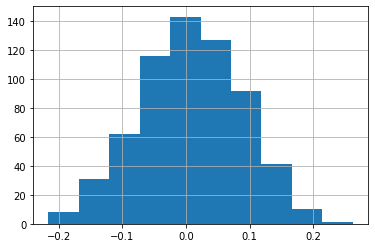

In [69]:
sorted_results_df['Spearman Correlation'].hist()

In [70]:
if TARGETS == 'abundance':
    # What percentage of significants?
    print("Percent of significants:", sorted_results_df['significant'].sum() / len(sorted_results_df))
    # Average prevalence of significant microbes baseline and intervention
    print("Average prevalence of significant microbes in baseline:", sorted_results_df[sorted_results_df['significant'] == 1]['PNP3_prevalence_baseline'].mean())
    print("Average prevalence of significant microbes in intervention:", sorted_results_df[sorted_results_df['significant'] == 1]['PNP3_prevalence_intervention'].mean())
    # Average prevalence of non-significant microbes baseline and intervention
    print("Average prevalence of non-significant microbes in baseline:", sorted_results_df[sorted_results_df['significant'] == 0]['PNP3_prevalence_baseline'].mean())
    print("Average prevalence of non-significant microbes in intervention:", sorted_results_df[sorted_results_df['significant'] == 0]['PNP3_prevalence_intervention'].mean())
    # Average prevalence in 10k
    print("Average prevalence in 10k:", sorted_results_df['10k_prevalence_baseline'].mean())
    # Average prevalence of non-significants in 10k
    print("Average prevalence of non-significants in 10k:", sorted_results_df[sorted_results_df['significant'] == 0]['10k_prevalence_baseline'].mean())

Percent of significants: 0.014263074484944533
Average prevalence of significant microbes in baseline: 114.88888888888889
Average prevalence of significant microbes in intervention: 118.44444444444444
Average prevalence of non-significant microbes in baseline: 53.265273311897104
Average prevalence of non-significant microbes in intervention: 56.27652733118971
Average prevalence in 10k: 2830.3264659271
Average prevalence of non-significants in 10k: 2789.2717041800643
